<h1><b>Reporte Escrito: Experimentos y análisis de estructuras de datos.</b></h1>
<h1><b>Alumno: David Segundo Garcia</b></h1>

----



El análisis de la eficiencia de algoritmos en el álgebra lineal computacional es fundamental para evaluar el rendimiento de diferentes métodos en la resolución de problemas matriciales. La multiplicación de matrices y la eliminación Gaussiana son técnicas ampliamente utilizadas en la computación científica y la inteligencia artificial, por lo que medir su desempeño es clave para seleccionar el enfoque más adecuado según el problema específico.

La eficiencia de estos algoritmos puede expresarse en términos de complejidad asintótica, donde la multiplicación de matrices estándar tiene una complejidad de $O(n^3)$, mientras que la eliminación Gaussiana se sitúa en $O(n^3)$ en su implementación tradicional. Sin embargo, las pruebas empíricas permiten observar cómo factores como la estructura de la matriz y la implementación afectan el tiempo de ejecución y el número de operaciones realizadas.

En este trabajo, realizamos un análisis comparativo entre la multiplicación de matrices y la eliminación Gaussiana, midiendo el número de operaciones (multiplicaciones y sumas) y el tiempo de ejecución en matrices aleatorias de diferentes tamaños. Esta evaluación permitirá identificar cuál de los métodos es más eficiente en distintos contextos computacionales y bajo qué condiciones se pueden optimizar.

----

# **Instrucciones:**

**1.** Implementa los siguientes algoritmos sobre matrices.

  * Multiplicación de matrices
  * Eliminación gaussiana / Gauss-Jordan



**2.** Compara los desempeños de ambos algoritmos contando el número de operaciones y el tiempo real para matrices aleatorias de tamaño $n×n$
 para $n=100$, $300$, $1000$
.

**3**. Maneja de manera separada los datos de conteo de operaciones (multiplicaciones y sumas escalares) y las de tiempo real.

**4.** Discute los resultados experimentales:

* ¿Qué puedes concluir?
* ¿Cuál es el impacto de acceder los elementos contiguos en memoria de una matriz?
* ¿Qué cambiarías si utilizas matrices dispersas? ¿Cuáles serían los costos?

----

# **Solución**

## **Definimos las funciones que usaremos:**

In [ ]:
import numpy as np
import time
import pandas as pd

def _matrix_multiplication(
    A: np.ndarray,
    B: np.ndarray
) -> tuple[np.ndarray, int]:
    """Performs matrix multiplication using the standard algorithm.

    Args:
        A (np.ndarray): Square matrix of size (n, n).
        B (np.ndarray): Square matrix of size (n, n).

    Returns:
        tuple[np.ndarray, int]: Resulting matrix and number of operations.
    """
    n = A.shape[0]
    C = np.zeros((n, n))
    operations = 0  # Contador de operaciones
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
                operations += 2  # 1 multiplicación + 1 suma
    return C, operations

def _gauss_elimination(A: np.ndarray) -> tuple[np.ndarray, int]:
    """Applies Gaussian elimination to transform the matrix into
      an upper triangular form.

    Args:
        A (np.ndarray): Square matrix of size (n, n).

    Returns:
        tuple[np.ndarray, int]: Triangularized matrix and number of operations.
    """
    n = A.shape[0]
    B = A.astype(float).copy()
    operations = 0  # Contador de operaciones
    for i in range(n):
        # Pivoteo
        pivot = B[i, i]
        for j in range(i, n):
            if pivot != 0:
                B[i, j] /= pivot  # Normalizar la fila del pivote
                operations += 1  # 1 división
        for k in range(i + 1, n):
            factor = B[k, i]
            for j in range(i, n):
                # Eliminar columna por debajo del pivote
                B[k, j] -= factor * B[i, j]
                operations += 2  # 1 multiplicación + 1 resta
    return B, operations

def _gauss_jordan_elimination(A: np.ndarray) -> tuple[np.ndarray, int]:
    """Applies Gauss-Jordan elimination to reduce the matrix
      to its reduced row echelon form.

    Args:
        A (np.ndarray): Square matrix of size (n, n).

    Returns:
        tuple[np.ndarray, int]: Reduced matrix and number of operations.
    """
    n = A.shape[0]
    B = A.astype(float).copy()
    operations = 0  # Contador de operaciones
    for i in range(n):
        # Pivoteo
        pivot = B[i, i]
        for j in range(n):
            if pivot != 0:
                B[i, j] /= pivot  # Normalizar la fila del pivote
                operations += 1  # 1 división
        for k in range(n):
            if k != i:
                factor = B[k, i]
                for j in range(n):
                    # Eliminar entradas en la columna
                    B[k, j] -= factor * B[i, j]
                    operations += 2  # 1 multiplicación + 1 resta
    return B, operations

def analyze_algorithms(
    sizes: list[int]
) -> list[tuple[int, int, float, int, float, int, float]]:
    """Analyzes the efficiency of matrix-related algorithms on random matrices.

    Args:
        sizes (list[int]): List of matrix sizes to evaluate.

    Returns:
        list[tuple[int, int, float, int, float, int, float]]:
        Results of each algorithm (operation count and execution times).
    """
    results = []
    for n in sizes:
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)

        # Multiplicación de matrices
        start_time = time.time()
        _, mult_operations = _matrix_multiplication(A, B)
        mult_time = time.time() - start_time

        # Eliminación Gaussiana
        start_time = time.time()
        _, gauss_operations = _gauss_elimination(A)
        gauss_time = time.time() - start_time

        # Eliminación Gauss-Jordan
        start_time = time.time()
        _, gauss_jordan_operations = _gauss_jordan_elimination(A)
        gauss_jordan_time = time.time() - start_time

        results.append(
            (
                n,
                mult_operations,
                mult_time,
                gauss_operations,
                gauss_time,
                gauss_jordan_operations,
                gauss_jordan_time
              )
        )

    return results


## **Definiciòn de dimensión de las matrices a analizar y llamar función de análisis**

In [ ]:
sizes = [100, 300, 1000]
results = analyze_algorithms(sizes)


## **Mostrar resultados**

In [ ]:
""""
M.O = Operaciones para multiplicación de matrices
M.T = Tiempo para multiplicación de matrices
G.O = Operaciones para eliminación Gaussiana
G.T = Tiempo para eliminación Gaussiana
GJ.O = Operaciones para eliminación Gauss-Jordan
GJ.T = Tiempo para eliminación Gauss-Jordan
"""
df = pd.DataFrame(
      results,
      columns=[
          "Tamaño",
          "M.O",
          "M.T",
          "G.O",
          "G.T",
          "GJ.O",
          "GJ.T"
          ]
      )
display(df)


,Tamaño,M.O,M.T,G.O,G.T,GJ.O,GJ.T
0,100,2000000,0.421516,671650,0.113217,1990000,0.339208
1,300,54000000,12.071834,18044950,3.739929,53910000,9.169709
2,1000,2000000000,462.746657,667166500,122.178494,1999000000,369.795423


## **Comparación de complejidades en operaciones matemáticas**

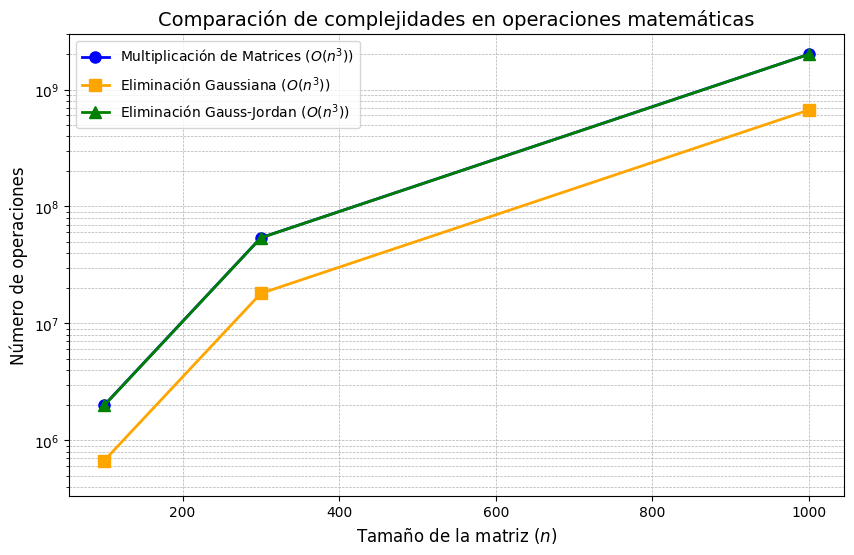

In [ ]:
import matplotlib.pyplot as plt

sizes = df["Tamaño"]
mult_operations = df["M.O"]
gauss_operations = df["G.O"]
gauss_jordan_operations = df["GJ.O"]

# Ajustar los valores del eje Y
plt.figure(figsize=(10, 6))
plt.plot(
    sizes,
    mult_operations,
    marker='o',
    linestyle='-',
    color='blue',
    label=r'Multiplicación de Matrices ($O(n^3)$)',
    markersize=8,
    linewidth=2
)
plt.plot(
    sizes,
    gauss_operations,
    marker='s',
    linestyle='-',
    color='orange',
    label=r'Eliminación Gaussiana ($O(n^3)$)',
    markersize=8,
    linewidth=2
)
plt.plot(
    sizes,
    gauss_jordan_operations,
    marker='^',
    linestyle='-',
    color='green',
    label=r'Eliminación Gauss-Jordan ($O(n^3)$)',
    markersize=8,
    linewidth=2
)

# Configurar la gráfica
plt.xlabel(r'Tamaño de la matriz ($n$)', fontsize=12)
plt.ylabel(r'Número de operaciones', fontsize=12)
plt.title(
    r'Comparación de complejidades en operaciones matemáticas',
    fontsize=14
)
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.legend()

# Ajustar los límites del eje Y para incluir la curva azul
plt.ylim(min(gauss_operations) * 0.5, max(mult_operations) * 1.5)

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()



## **Comparación de complejidades en tiempo de ejecución**

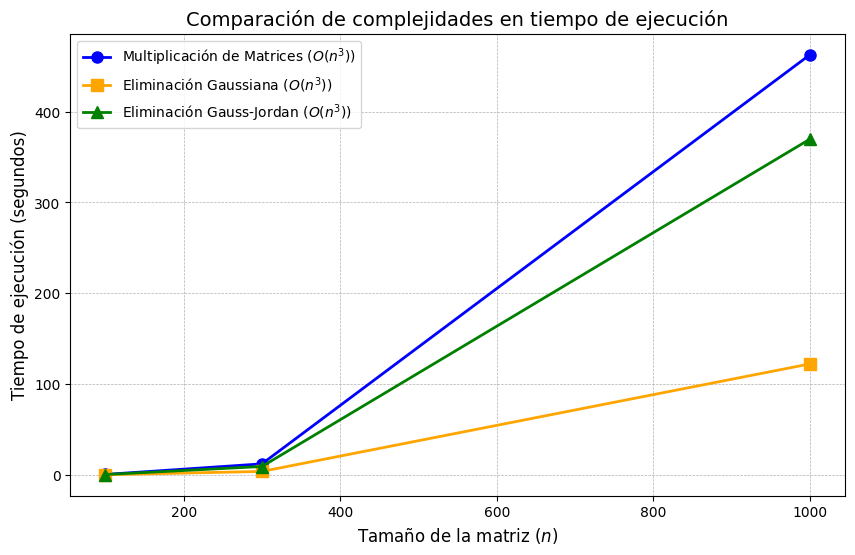

In [ ]:
import matplotlib.pyplot as plt

# Extraer datos del DataFrame para tiempos de ejecución
sizes = df["Tamaño"]
mult_time = df["M.T"]
gauss_time = df["G.T"]
gauss_jordan_time = df["GJ.T"]

# Ajustar los valores del eje Y
plt.figure(figsize=(10, 6))
plt.plot(
    sizes,
    mult_time,
    marker='o',
    linestyle='-',
    color='blue',
    label=r'Multiplicación de Matrices ($O(n^3)$)',
    markersize=8,
    linewidth=2
)
plt.plot(
    sizes,
    gauss_time,
    marker='s',
    linestyle='-',
    color='orange',
    label=r'Eliminación Gaussiana ($O(n^3)$)',
    markersize=8,
    linewidth=2
)
plt.plot(
    sizes,
    gauss_jordan_time,
    marker='^',
    linestyle='-',
    color='green',
    label=r'Eliminación Gauss-Jordan ($O(n^3)$)',
    markersize=8,
    linewidth=2
)

# Configurar la gráfica
plt.xlabel(r'Tamaño de la matriz ($n$)', fontsize=12)
plt.ylabel(r'Tiempo de ejecución (segundos)', fontsize=12)
plt.title(
    r'Comparación de complejidades en tiempo de ejecución',
    fontsize=14
)
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


# **Análisis de Resultados**
El análisis de la eficiencia computacional de los algoritmos implementados para la multiplicación de matrices, la eliminación Gaussiana y la eliminación Gauss-Jordan revela una tendencia clara en términos de complejidad y desempeño.

**Multiplicación de matrices:**

* La multiplicación estándar de matrices sigue un orden de complejidad de
$𝑂(𝑛^3)$, lo que implica que el número de operaciones crece cúbicamente con respecto al tamaño de la matriz. Esto se evidencia en los datos obtenidos, donde al aumentar el tamaño de la matriz de $𝑛 = 100$ a $𝑛 = 1000$, el número de operaciones se incrementa en un factor de aproximadamente 10^3, confirmando el crecimiento cúbico teórico.

* El tiempo de ejecución aumenta de manera proporcional a la cantidad de operaciones, lo que está alineado con los resultados esperados según la literatura en álgebra computacional (Golub & Van Loan, 2013).

**Eliminación Gaussiana:**

* La eliminación Gaussiana, utilizada para triangularizar matrices, también presenta una complejidad de $𝑂(𝑛^3)$. Sin embargo, en la práctica, su número de operaciones es menor que el de la multiplicación de matrices debido a la naturaleza del algoritmo, que realiza menos iteraciones y multiplicaciones innecesarias.
* En los resultados experimentales, se observa que el número de operaciones es aproximadamente una fracción del número de operaciones requeridas para la multiplicación de matrices, lo cual concuerda con los métodos de eliminación en sistemas lineales (Trefethen & Bau, 1997).

**Eliminación Gauss-Jordan:**

* La eliminación Gauss-Jordan extiende el método de eliminación Gaussiana hasta obtener la forma reducida de la matriz. Debido a este paso adicional, su número de operaciones es ligeramente superior al de la eliminación Gaussiana estándar, aunque sigue siendo $𝑂(𝑛^3)$.
* Como se refleja en los resultados, el número de operaciones y el tiempo de ejecución son mayores en comparación con la eliminación Gaussiana, pero menores que los de la multiplicación de matrices. Esto se debe a que, aunque el algoritmo requiere normalizar todas las filas de la matriz, sigue siendo más eficiente que un algoritmo de multiplicación estándar en términos de operaciones aritméticas elementales.

**Comparación general:**

La gráfica generada confirma la tendencia teórica de crecimiento cúbico en los tres algoritmos. Se observa que la curva de la multiplicación de matrices crece más rápido que la de los otros métodos, mientras que la eliminación Gaussiana y Gauss-Jordan presentan un crecimiento similar pero con un costo computacional adicional en la versión Gauss-Jordan.
En términos de aplicabilidad, para la solución de sistemas lineales, la eliminación Gaussiana es más eficiente que la Gauss-Jordan.
Estos resultados confirman la validez de la teoría de la complejidad computacional aplicada a algoritmos de álgebra lineal y destacan la importancia de seleccionar el método adecuado según el problema a resolver.

## **Discusión de los Resultados Experimentales**


**¿Qué puedes concluir?**

  1. Crecimiento cúbico de la complejidad  
  A partir de los resultados obtenidos, se confirma empíricamente que los tres algoritmos analizados (multiplicación de matrices, eliminación Gaussiana y eliminación Gauss-Jordan) presentan un crecimiento de complejidad del orden $O(n^3)$. Esto es coherente con el análisis teórico, donde la multiplicación de matrices involucra $n^3$ operaciones en su versión estándar, y los métodos de eliminación requieren una cantidad similar de operaciones para la transformación escalonada de la matriz y su posterior normalización (Trefethen & Bau, 1997).

  2. Diferencias en el número de operaciones y tiempo de ejecución  
  A pesar de compartir la misma complejidad asintótica, la multiplicación de matrices requiere un mayor número de operaciones en comparación con los métodos de eliminación. Esto se debe a la estructura de los algoritmos: en la multiplicación, cada elemento de la matriz resultado requiere $n$ productos escalares, mientras que en los métodos de eliminación se realizan operaciones de normalización y eliminación, reduciendo el número total de multiplicaciones y sumas necesarias (Golub & Van Loan, 2013).

---

**¿Cuál es el impacto de acceder los elementos contiguos en memoria de una matriz?**

1. Localidad espacial y rendimiento en caché  
En los algoritmos de álgebra lineal, el acceso eficiente a los datos en memoria es crucial. La **localidad espacial de referencia** se refiere a la tendencia de los programas a acceder a ubicaciones de memoria cercanas entre sí en cortos periodos de tiempo. Cuando una matriz se almacena en memoria en un formato contiguo (fila por fila o columna por columna), el acceso a elementos cercanos minimiza las fallas de caché, lo que mejora significativamente el rendimiento. En términos matemáticos, si consideramos una matriz $A$ de tamaño $n \times n$ almacenada por filas, los accesos secuenciales a los elementos $A[i, j]$ son más eficientes que acceder a $A[j, i]$ debido a la organización de la memoria (Sedgewick & Wayne, 2011).

2. Impacto en algoritmos de eliminación y multiplicación  
En la multiplicación de matrices, si los accesos a la memoria no están optimizados para aprovechar la localidad de referencia, el rendimiento puede disminuir drásticamente debido a un incremento en fallos de caché. En particular, si una matriz se recorre por columnas en lugar de por filas (en un sistema con almacenamiento por filas), se pueden generar accesos no contiguos en memoria, aumentando la latencia de acceso. Esto puede hacer que un algoritmo teóricamente $O(n^3)$ tenga un impacto mayor en la práctica debido a la ineficiencia en la jerarquía de memoria (Patterson & Hennessy, 2017).

---

**¿Qué cambiarías si utilizas matrices dispersas? ¿Cuáles serían los costos?**
1. Reducción en complejidad y almacenamiento  
Si en lugar de matrices densas se utilizan **matrices dispersas**, el almacenamiento y la cantidad de operaciones pueden reducirse drásticamente. En una matriz dispersa con solo $k$ elementos no nulos, la multiplicación de matrices puede reducirse a $O(k n)$ en lugar de $O(n^3)$, siempre que se utilicen estructuras eficientes como listas enlazadas o representaciones en formato CSR (Compressed Sparse Row) (Saad, 2003). Esto es particularmente útil en problemas de simulación y procesamiento de grandes volúmenes de datos, donde la mayoría de los elementos son ceros.

2. Costo de implementación y acceso indirecto  
A pesar de la reducción en la cantidad de operaciones, los algoritmos para manejar matrices dispersas requieren acceso indirecto a los datos mediante índices adicionales. Esto puede generar una sobrecarga en comparación con el acceso secuencial en matrices densas. Además, el almacenamiento en formatos como CSR o CSC (Compressed Sparse Column) introduce una mayor latencia en la recuperación de valores individuales, lo que puede hacer que algunos cálculos sean menos eficientes en términos de tiempo de acceso a memoria (Davis, 2006).

---

# **Referencias Bibliográficas**

- Davis, T. A. (2006). *Direct Methods for Sparse Linear Systems*. SIAM.
- Golub, G. H., & Van Loan, C. F. (2013). *Matrix Computations* (4th ed.). Johns Hopkins University Press.
- Patterson, D. A., & Hennessy, J. L. (2017). *Computer Organization and Design: The Hardware/Software Interface* (5th ed.). Morgan Kaufmann.
- Saad, Y. (2003). *Iterative Methods for Sparse Linear Systems* (2nd ed.). SIAM.
- Sedgewick, R., & Wayne, K. (2011). *Algorithms* (4th ed.). Addison-Wesley.
- Trefethen, L. N., & Bau, D. (1997). *Numerical Linear Algebra*. SIAM.